# Enunciado
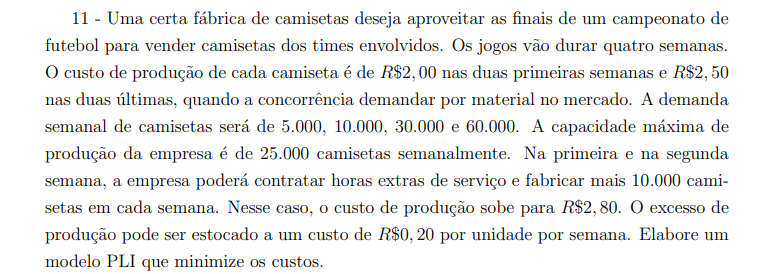

In [ ]:
import gurobipy as gp
from gurobipy import GRB

def planejar_producao_camisetas():
    try:
        #  1. DADOS DO PROBLEMA 
        semanas = [1, 2, 3, 4]

        demanda = {1: 5000, 2: 10000, 3: 30000, 4: 60000}
        custo_regular = {1: 2.00, 2: 2.00, 3: 2.50, 4: 2.50}
        custo_extra   = {1: 2.80, 2: 2.80, 3: 0.00, 4: 0.00}
        capacidade_regular = {t: 25000 for t in semanas}
        capacidade_extra   = {1: 10000, 2: 10000, 3: 0, 4: 0}

        custo_estoque = 0.20
        estoque_inicial = 0

        #  2. MODELO 
        m = gp.Model("Planejamento_Fabrica_Camisetas")

        #  3. VARIÁVEIS DE DECISÃO 
        x = m.addVars(semanas, vtype=GRB.CONTINUOUS, name="ProdRegular")
        y = m.addVars(semanas, vtype=GRB.CONTINUOUS, name="ProdExtra")
        I = m.addVars([0] + semanas, vtype=GRB.CONTINUOUS, name="Estoque")

        # 4. FUNÇÃO OBJETIVO 
        custo_producao = gp.quicksum(custo_regular[t] * x[t] + custo_extra[t] * y[t] for t in semanas)
        custo_armazenagem = gp.quicksum(custo_estoque * I[t] for t in semanas)
        m.setObjective(custo_producao + custo_armazenagem, GRB.MINIMIZE)

        # 5. RESTRIÇÕES 
        m.addConstr(I[0] == estoque_inicial, "Estoque_Inicial")

        for t in semanas:
            m.addConstr(I[t-1] + x[t] + y[t] == demanda[t] + I[t], f"Balanco_Semana_{t}")
            m.addConstr(x[t] <= capacidade_regular[t], f"Capacidade_Regular_{t}")
            m.addConstr(y[t] <= capacidade_extra[t], f"Capacidade_Extra_{t}")

        # 6. OTIMIZAÇÃO 
        m.optimize()

        #  7. RESULTADOS 
        if m.status == GRB.OPTIMAL:
            print("\n" + "="*75)
            print("PLANO DE PRODUÇÃO ÓTIMO - FÁBRICA DE CAMISETAS")
            print("="*75)
            print(f" Custo Total Mínimo: R$ {m.objVal:,.2f}")
            print("-"*75)
            print(f"{'Semana':>6} | {'Demanda':>9} | {'Regular':>10} | {'Extra':>10} | {'Estoque Final':>14}")
            print("-"*75)

            for t in semanas:
                print(f"{t:>6} | {demanda[t]:>9,.0f} | {x[t].x:>10,.0f} | {y[t].x:>10,.0f} | {I[t].x:>14,.0f}")

            print("-"*75)
            print(f"Estoque inicial: {I[0].x:,.0f}")
            print("="*75)

        else:
            print(" Não foi possível encontrar uma solução ótima.")

    except gp.GurobiError as e:
        print(f"Erro no Gurobi [código {e.errno}]: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

# --- Execução ---
planejar_producao_camisetas()


# Resultados
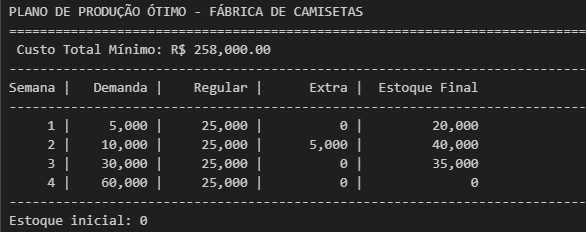